# **Ataque cardíaco**

> Ataque cardíaco acontece quando o coração não recebe quantidade suficiente de oxigênio fazendo com que uma parte dele morra  e não funcione da maneira correta. A maior causa desse fato é a grande quantidade de gordura na parede das artérias formando placas que obstruem o vaso sanguíneo e impede o fluxo do sangue.Os sintomas são dores no peito, no ombro, braço, barriga ou mandíbula, falta de ar, suores, náuseas, fraqueza, tonteira e palidez. 

> <img src="https://github.com/MonizGarcia5/Data_Science/raw/main/Prever_ataque_cardiaco/ImageAtaqCard.jpg" />

> O conjunto de dados contém informações médicas de pacientes que indicam a chance de uma pessoa ter um ataque cardíaco é menor ou maior.O campo "alvo" refere-se à presença de doença cardíaca no paciente. É um número inteiro com valor 0 = nenhuma / menos chance de ataque cardíaco e 1 = mais chance de ataque cardíaco. Segue informação dos Atributos.



##  Informações dos atributos

1) Idade

2) sexo 

3) tpdorpeito = tipo de dor no peito (4 valores)

4) presartrep = pressão arterial em repouso 

5) colesterol = colesterol sérico em mg / dl 

6) acucarsangue = açúcar no sangue em jejum> 120 mg / dl 

7) eletrocardiograma = resultados eletrocardiográficos de repouso (valores 0,1,2) 

8) freqcardiacamax = frequência cardíaca máxima alcançada 

9) angima = angina induzida por exercício 

10) picoantigo = depressão de ST induzida por exercício em relação ao repouso 

11) isegmentost	= a inclinação do segmento ST de pico de exercício 

12) nuvasosprincipal = número de vasos principais (0-3) coloridos por fluorosopia 

13) tpdefeito: 0 = normal; 1 = defeito corrigido; 2 = defeito reversível 

14) ataquecardiaco: 0 = menos chance de ataque cardíaco 1 = mais chance de ataque cardíaco


Fonte dos dados: https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility

## Indice
1) Pacotes utilizados

2) Exploracao e analise de dados

3) Pre-processamento de dados

4) Avaliando o modelo

5) Conclusão

## 1) Pacotes utilizados

In [1]:
# carregar e tratar o conjunto de dados
import pandas as pd
# Exploração e análise de dados
import seaborn as sns
# Divide os dados dos modelo 
from sklearn.model_selection import cross_val_predict
# pre- processamento de dados
from sklearn.preprocessing import StandardScaler
# Analise exploratória dos dados
import pandas_profiling as pp
# Divide os dados entre treino e teste
from sklearn.model_selection import train_test_split
# Treinamento e previsão usando o algoritmo KNN 
from sklearn.neighbors import KNeighborsClassifier
# Treinamento e previsão usando o algoritmo LogisticRegression 
from sklearn.linear_model import LogisticRegression
# Treinamento e previsão usando o algoritmo RandomForest
from sklearn.ensemble import RandomForestClassifier
# Treinamento e previsão usando o algoritmo DecisionTree
from sklearn.tree import DecisionTreeClassifier
# Treinamento e previsão usando o algoritmo SVC
from sklearn.svm import SVC
from sklearn import svm
# Metricas de classificacao 
from sklearn import metrics
from sklearn.metrics import accuracy_score
# Selecionar o melhor parametro de K
from sklearn.model_selection import GridSearchCV
# Biblioteca para trabalhar com Pipelines
from sklearn.pipeline import Pipeline
# Biblioteca para plotagem de relatorio
import matplotlib.pyplot as plt
# Biblioteca StratifiedKFold
from sklearn.model_selection import StratifiedKFold
# Biblioteca RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df_ha = pd.read_csv('C:/Portfolio/Classificacao/KNN/DataSet/heart.csv')
df_ha.head()

idade  sexo  tpdorpeito  presartrep  colesterol  acucarsangue  \
0     63     1           3         145         233             1   
1     37     1           2         130         250             0   
2     41     0           1         130         204             0   
3     56     1           1         120         236             0   
4     57     0           0         120         354             0   

   eletrocardiograma  freqcardiacamax  angima  picoantigo  isegmentost  \
0                  0              150       0         2.3            0   
1                  1              187       0         3.5            0   
2                  0              172       0         1.4            2   
3                  1              178       0         0.8            2   
4                  1              163       1         0.6            2   

   nuvasosprincipal  tpdefeito  ataquecardiaco  
0                 0          1               1  
1                 0          2               1  
2                 0          2               1  
3                 0          2               1  
4                 0          2               1

In [3]:
df_ha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   idade              303 non-null    int64  
 1   sexo               303 non-null    int64  
 2   tpdorpeito         303 non-null    int64  
 3   presartrep         303 non-null    int64  
 4   colesterol         303 non-null    int64  
 5   acucarsangue       303 non-null    int64  
 6   eletrocardiograma  303 non-null    int64  
 7   freqcardiacamax    303 non-null    int64  
 8   angima             303 non-null    int64  
 9   picoantigo         303 non-null    float64
 10  isegmentost        303 non-null    int64  
 11  nuvasosprincipal   303 non-null    int64  
 12  tpdefeito          303 non-null    int64  
 13  ataquecardiaco     303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## **2) Exploração e análise dos dados**

In [72]:
relat=pp.ProfileReport(df_ha, title='Relatório Ataque Cardíaco', explorative=True)
relat.to_notebook_iframe()
relat


Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 3) Pre-processamento de dados

In [5]:
# remove registros duplicados
df_ha = df_ha.drop_duplicates()

## 4) Avaliando o Modelo

Avaliando a precisão da previsão dos algoritmos de classificação a seguir.

1. K-Nearest Neighbour
2. Logistic Regression
3. Random Forest 
4. Decision Tree
5. Support Vector Machine

In [6]:
# Dividindo os dados entre treino e teste
from sklearn.model_selection import train_test_split
X = df_ha.drop(['ataquecardiaco'], axis=1)
Y =  df_ha['ataquecardiaco']

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state = 0)

In [7]:
# Transforamndo os dados com o objeto Scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
modelo_1 = 'K-Nearest Neighbour'

# Selecionando o melhor K com base na acurácia
k_list = list(range(1,51))
k_values = dict(n_neighbors=k_list)
for itemlista in k_list:
   knn = KNeighborsClassifier(n_neighbors=itemlista)
   # Treinando algoritmo 
   knn.fit(X_train,y_train)
   # Prevendo com o conjunto de teste 
   result = knn.predict(X_test)
   knn_acc_score = accuracy_score(y_test, result)
   if itemlista==1:
      l_nK=[itemlista]
      acc = [knn_acc_score]
   else:
      l_nK.append(itemlista)
      acc.append(knn_acc_score)

In [9]:
# Criação do datafame com resultado das acuracia por valor de K

datax= {'NuK':l_nK,'Acuracia':acc}
df_mk= pd.DataFrame(datax,columns=['NuK','Acuracia'])

In [10]:
# Seleciona o valor de K que contém a maior acurácia

maxAcc= df_mk['Acuracia'].max()
melhorAcc=df_mk.loc[df_mk['Acuracia']== maxAcc]
melhorK = melhorAcc.iat[0,0]

In [11]:
mknn= KNeighborsClassifier(n_neighbors=melhorK)
modelo = mknn.fit(X_train, y_train)
mknn_predict = mknn.predict(X_test)
mknn_matrix_conf = pd.crosstab(y_test, mknn_predict ,rownames=['Real'], colnames=['          Previsto'], margins=True)

# Metricas de avaliação do modelo K-Nearest Neighbour
mknn_acuracia = accuracy_score(y_test, mknn_predict)
print(mknn_matrix_conf)

print("\n")
print("Acurácia da K-Nearest Neighbour:",mknn_acuracia*100,'\n')
print(metrics.classification_report(y_test,mknn_predict))

          Previsto   0   1  All
Real                           
0                   38   7   45
1                    4  42   46
All                 42  49   91


Acurácia da K-Nearest Neighbour: 87.91208791208791 

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        45
           1       0.86      0.91      0.88        46

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91



In [12]:
modelo_2 = 'Logistic Regression'

mr_l = LogisticRegression()
modelo = mr_l.fit(X_train, y_train)
mr_l_predict = mr_l.predict(X_test)
mr_l_matrix_conf = pd.crosstab(y_test, mr_l_predict ,rownames=['Real'], colnames=['          Previsto'], margins=True)

# Metricas de avaliação do modelo Logistic Regression
mr_l_acuracia = accuracy_score(y_test, mr_l_predict)

print(mr_l_matrix_conf)
print("\n")

print("Acurácia da Regressão Logistica:",mr_l_acuracia*100,'\n')
print(metrics.classification_report(y_test,mr_l_predict))

          Previsto   0   1  All
Real                           
0                   34  11   45
1                    5  41   46
All                 39  52   91


Acurácia da Regressão Logistica: 82.41758241758241 

              precision    recall  f1-score   support

           0       0.87      0.76      0.81        45
           1       0.79      0.89      0.84        46

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



In [13]:
modelo_3 = 'Random Forest'

# Valores de estimators
val_estimators = [20, 50, 100, 150, 200]

# Valores para o critério de divisão
val_criterion = ['gini', 'entropy']

# listas de parâmetros e valores
parametros_grid = dict(n_estimators = val_estimators,
                       criterion = val_criterion)
                       
# Criando o modelo
modelo_random = RandomForestClassifier()

# Definindo K
kfold = StratifiedKFold(n_splits=10, shuffle = True, random_state=7)

# Testando combinações com os parâmetros
grid = RandomizedSearchCV(estimator = modelo_random, param_distributions = parametros_grid, cv = kfold, scoring = 'accuracy')
grid.fit(X_train,y_train)

# Resultado
print("Grid scores on development set:")
means = grid.cv_results_['mean_test_score'].round(5)
stds = grid.cv_results_['std_test_score'].round(5)

for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print(f'mean:{mean},std:{std},params:{params}')
print()
print(f'Melhor parâmetro:{grid.best_params_}, Score:{grid.best_score_}')

Grid scores on development set:
mean:0.80043,std:0.09284,params:{'n_estimators': 20, 'criterion': 'gini'}
mean:0.80519,std:0.07573,params:{'n_estimators': 50, 'criterion': 'gini'}
mean:0.80996,std:0.06454,params:{'n_estimators': 100, 'criterion': 'gini'}
mean:0.79113,std:0.06867,params:{'n_estimators': 150, 'criterion': 'gini'}
mean:0.81472,std:0.05482,params:{'n_estimators': 200, 'criterion': 'gini'}
mean:0.82468,std:0.06738,params:{'n_estimators': 20, 'criterion': 'entropy'}
mean:0.80974,std:0.08286,params:{'n_estimators': 50, 'criterion': 'entropy'}
mean:0.81494,std:0.06927,params:{'n_estimators': 100, 'criterion': 'entropy'}
mean:0.82424,std:0.08027,params:{'n_estimators': 150, 'criterion': 'entropy'}
mean:0.80065,std:0.07054,params:{'n_estimators': 200, 'criterion': 'entropy'}

Melhor parâmetro:{'n_estimators': 20, 'criterion': 'entropy'}, Score:0.8246753246753247


In [14]:
# Melhor acurácia do modelo Random Forest
mr_f_acuracia=grid.best_score_

In [15]:
# Verificando as features mais importantes para o modelo.
clf=RandomForestClassifier(n_estimators=150, random_state=7)
clf.fit(X , Y)
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)

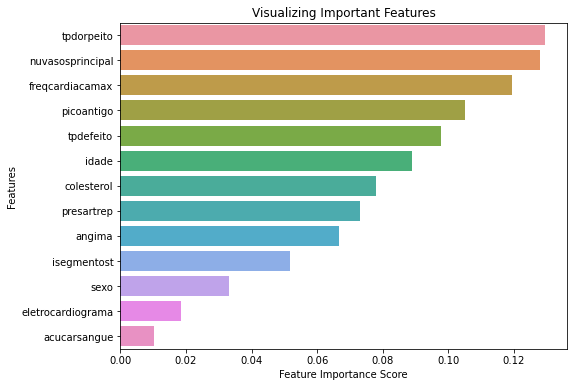

In [16]:
plt.figure(figsize=(8,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [17]:
modelo_4 = 'DecisionTree'

# Função para calcular a acuracia da Arvore de decisão utilizando 
# o parametro max_depth ( profundidade máxima da árvore )

def treinar_arvore(maxdepth):
    if maxdepth == 0:
        dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0)
    else:   
        dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0, max_depth=maxdepth)
    dt.fit(X_train, y_train)
    md_t_predict = dt.predict(X_test)
    md_t_acuracia = accuracy_score(y_test, md_t_predict)
    return md_t_acuracia

In [18]:
# Calcula a acuracia do algoritmo DecisionTree para Max_depth igual a 0,2,3,4,6,10 e 15
print('{:10} {:20}'.format('Max_depth','Acurácia'))
print('{:10} {:20}'.format('---------', '-----------------'))
print('{:1}         {}'.format(2,str(treinar_arvore(2))))
print('{:1}         {}'.format(3,str(treinar_arvore(3))))
print('{:1}         {}'.format(4,str(treinar_arvore(4))))
print('{:1}         {}'.format(6,str(treinar_arvore(6))))
print('{:1}        {}'.format(10,str(treinar_arvore(10))))
print('{:1}        {}'.format(15,str(treinar_arvore(15))))
print('{:1}      {}'.format('Full',str(treinar_arvore(0))))

Max_depth  Acurácia            
---------  -----------------   
2         0.7582417582417582
3         0.8241758241758241
4         0.8131868131868132
6         0.7582417582417582
10        0.7692307692307693
15        0.7692307692307693
Full      0.7692307692307693


In [19]:
# Melhor accuracia de 0.8241758241758241 obtida com Max_depth igual a 3
melhor_max_depth=3

In [20]:
modelo_4 = 'DecisionTree'

md_t = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = melhor_max_depth)
modelo = md_t.fit(X_train, y_train)
md_t_predict = md_t.predict(X_test)
md_t_matrix_conf = pd.crosstab(y_test, md_t_predict ,rownames=['Real'], colnames=['          Previsto'], margins=True)

# Metricas de avaliação do modelo DecisionTree

md_t_acuracia = accuracy_score(y_test, md_t_predict)

print(md_t_matrix_conf)
print("\n")
print("Acurácia do DecisionTree:",md_t_acuracia*100,'\n')
print(metrics.classification_report(y_test,md_t_predict))

          Previsto   0   1  All
Real                           
0                   33  12   45
1                    4  42   46
All                 37  54   91


Acurácia do DecisionTree: 82.41758241758241 

              precision    recall  f1-score   support

           0       0.89      0.73      0.80        45
           1       0.78      0.91      0.84        46

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



In [21]:
modelo_5 = 'Support Vector Classifier'

# Criando os pipelines
pip_svm_1 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='rbf'))
])

pip_svm_2 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='poly'))
])
pip_svm_3 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='linear'))
])
pip_svm_4 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='sigmoid'))
])

In [22]:
# Calculando a acucaria para os pipeline 

# pip_svm_1
modelo = pip_svm_1.fit(X_train, y_train)
msvc_predict_1 = pip_svm_1.predict(X_test)
msvc_acuracia_1 = accuracy_score(y_test, msvc_predict_1)

# pip_svm_2
modelo = pip_svm_2.fit(X_train, y_train)
msvc_predict_2 = pip_svm_2.predict(X_test)
msvc_acuracia_2 = accuracy_score(y_test, msvc_predict_2)

# pip_svm_3
modelo = pip_svm_3.fit(X_train, y_train)
msvc_predict_3 = pip_svm_3.predict(X_test)
msvc_acuracia_3 = accuracy_score(y_test, msvc_predict_3)

# pip_svm_4
modelo = pip_svm_4.fit(X_train, y_train)
msvc_predict_4 = pip_svm_4.predict(X_test)
msvc_acuracia_4 = accuracy_score(y_test, msvc_predict_4)


In [23]:
# Seleciona a melhor acuracia (SVM)
melhorpip_svc = msvc_acuracia_1
melhorpip = pip_svm_1
if msvc_acuracia_2 > msvc_acuracia_1:
   melhorpip = pip_svm_2
elif msvc_acuracia_3 > msvc_acuracia_1:
   melhorpip = pip_svm_3

In [24]:
modelo = melhorpip.fit(X_train, y_train)
msvc_predict = melhorpip.predict(X_test)
msvc_acuracia = accuracy_score(y_test, msvc_predict)
msvc_matrix_conf = pd.crosstab(y_test, msvc_predict ,rownames=['Real'], colnames=['          Previsto'], margins=True)

# Metricas de avaliação do modelo Support Vector Classifier
msvc_acuracia = accuracy_score(y_test, msvc_predict)
print(msvc_matrix_conf)
print("\n")
print("Acurácia do Support Vector Classifier:",msvc_acuracia*100,'\n')
print(metrics.classification_report(y_test,msvc_predict))

          Previsto   0   1  All
Real                           
0                   34  11   45
1                    4  42   46
All                 38  53   91


Acurácia do Support Vector Classifier: 83.51648351648352 

              precision    recall  f1-score   support

           0       0.89      0.76      0.82        45
           1       0.79      0.91      0.85        46

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



In [25]:
# Relação dos modelos e os seus melhores valores de acurácia e portanto os melhores resultados.

df_acur = pd.DataFrame({'Algoritmo': ['K-Nearest Neighbour','Logistic Regression','Random Forest','Decision Tree','Support Vector Machine'],
                        'Acurácia': [mknn_acuracia*100,mr_l_acuracia*100,mr_f_acuracia*100,md_t_acuracia*100,msvc_acuracia*100]})

df_acur

Algoritmo   Acurácia
0     K-Nearest Neighbour  87.912088
1     Logistic Regression  82.417582
2           Random Forest  82.467532
3           Decision Tree  82.417582
4  Support Vector Machine  83.516484

## **Conclusão**

1) O algoritmo K-Nearest Neighbour tem a melhor acurácia comparado com os outros modelos.

2) Os principais sintomas de ataque cardíaco são: dor no peito e número de vasos principais.
